In [1]:
import copy
import math
from math import sin
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def createMatrix(a1, N):
    a2 = -1
    a3 = -1
    matrix = []
    for i in range(N):
        rowList = []
        for j in range(N):
            if i == j:
                rowList.append(a1)
            elif i == j + 1 or i == j - 1:
                rowList.append(a2)
            elif i == j + 2 or i == j - 2:
                rowList.append(a3)
            else:
                rowList.append(0)
        matrix.append(rowList)
    return matrix


def createVector(N):
    vector = [0] * N
    for i in range(0, N):
        row = sin(i * (4 + 1))
        vector[i] = row
    return vector

createMatrix(12, 10)

[[12, -1, -1, 0, 0, 0, 0, 0, 0, 0],
 [-1, 12, -1, -1, 0, 0, 0, 0, 0, 0],
 [-1, -1, 12, -1, -1, 0, 0, 0, 0, 0],
 [0, -1, -1, 12, -1, -1, 0, 0, 0, 0],
 [0, 0, -1, -1, 12, -1, -1, 0, 0, 0],
 [0, 0, 0, -1, -1, 12, -1, -1, 0, 0],
 [0, 0, 0, 0, -1, -1, 12, -1, -1, 0],
 [0, 0, 0, 0, 0, -1, -1, 12, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, 12, -1],
 [0, 0, 0, 0, 0, 0, 0, -1, -1, 12]]

In [2]:
createVector(10)

[0.0,
 -0.9589242746631385,
 -0.5440211108893698,
 0.6502878401571168,
 0.9129452507276277,
 -0.13235175009777303,
 -0.9880316240928618,
 -0.428182669496151,
 0.7451131604793488,
 0.8509035245341184]

In [3]:
def dotProduct(A, b):
    n = len(A)
    result = [0] * n
    for i in range(n):
        for j in range(n):
            result[i] += b[j] * A[i][j]
    return result

def residuum(A, b, x):
    n = len(A)
    res = [0] * n
    Ax = dotProduct(A, x)
    for i in range(0, n):
        res[i] = Ax[i] - b[i]
    return res

def norm(r):
    result = 0
    for i in range(0, len(r)):
        result += r[i] * r[i]
    return math.sqrt(result)

def jacobiMethod(A, b, eps):
    n = len(A)
    rOld = [0] * n
    rNew = [0] * n
    nor = 1
    k = 0
    start = timer()
    while nor > eps and k < 100:
        k += 1
        for i in range(0, n):
            value = 0
            for j in range(0, n):
                if j != i:
                    value += A[i][j] * rOld[j]
            rNew[i] = (b[i] - value)/A[i][i]
        rOld = rNew
        nor = norm(residuum(A, b, rNew))
    end = timer()
    time = end - start
    return rNew, k, time

def gaussSeidelMethod(A, b, eps):
    n = len(A)
    r = [0] * n
    nor = 1
    k = 0
    start = timer()
    while nor > eps and k < 100:
        k += 1
        for i in range(0, n):
            value = 0
            for j in range(0, n):
                if j != i:
                    value += A[i][j] * r[j]
            r[i] = (b[i] - value)/A[i][i]
        nor = norm(residuum(A, b, r))
    end = timer()
    time = end - start
    return r, k, time

A = createMatrix(12, 987)
b = createVector(987)
jacSol, jacK, jacTime = jacobiMethod(A, b, 1e-9)
gauSol, gauK, gauTime = gaussSeidelMethod(A, b, 1e-9)
print("Jacobi iterations: ", jacK)
print("Jacobi time: ", jacTime)
print("Guss-Seidel iterations: ", gauK)
print("Gauss-Seidel time: ", gauTime)

Jacobi iterations:  12
Jacobi time:  4.7342762
Guss-Seidel iterations:  12
Gauss-Seidel time:  4.176069999999999


In [4]:
A = createMatrix(3, 987)
b = createVector(987)

jacSol, jacK, jacTime = jacobiMethod(A, b, 1e-9)
gauSol, gauK, gauTime = gaussSeidelMethod(A, b, 1e-9)
print("Jacobi iterations: ", jacK)
print("Jacobi time: ", jacTime)
print("Guss-Seidel iterations: ", gauK)
print("Gauss-Seidel time: ", gauTime)

Jacobi iterations:  100
Jacobi time:  31.9139785
Guss-Seidel iterations:  100
Gauss-Seidel time:  35.1267327


In [5]:
def createOnesMatrix(N):
    result = []
    for i in range(N):
        row = []
        for j in range(N):
            if i == j:
                row.append(1)
            else:
                row.append(0)
        result.append(row)
    return result

def luDecomposition(A):
    U = copy.deepcopy(A)
    L = createOnesMatrix(len(A))
    for k in range(0, len(A)):
        for j in range(k + 1, len(A)):
            L[j][k] = U[j][k] / U[k][k]
            for i in range(k, len(A)):
                U[j][i] = U[j][i] - L[j][k] * U[k][i]
    return L, U

def forwardSubstitution(L, b):
    n = len(L)
    x = [0] * n
    for i in range(0, n):
        value = b[i]
        for j in range(0, i):
            value -= L[i][j] * x[j]
        x[i] = value / L[i][i]
    return x

def backwardSubstitution(U, y):
    n = len(U)
    x = [0] * n
    for i in range(n - 1, -1, -1):
        value = y[i]
        for j in range(i, n):
            value -= U[i][j] * x[j]
        x[i] = value / U[i][i]
    return x

def luFactorization(A, b):
    start = timer()
    L, U = luDecomposition(A)
    y = forwardSubstitution(L, b)
    x = backwardSubstitution(U, y)
    end = timer()
    time = end - start
    return x, time

A = createMatrix(3, 987)
b = createVector(987)
luSol, luTime = luFactorization(A, b)
print("lu time: ", luTime)
print("lu norm from residuum: ", norm(residuum(A, b, luSol)))

lu time:  74.09924620000001
lu norm from residuum:  3.452106146813692e-13


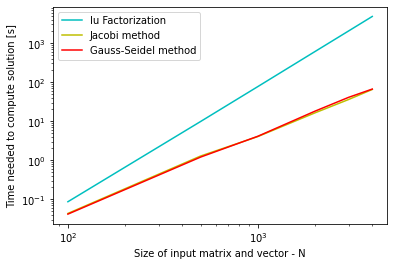

In [6]:
sizes = [100, 500, 1000, 2000, 3000, 4000]
timeLu = [0] * 6
timeJac = [0] * 6
timeGau = [0] * 6


for i in range(0, len(sizes)):
    N = sizes[i]
    A = createMatrix(12, N)
    b = createVector(N)
    timeLu[i] = luFactorization(A, b)[1]
    timeJac[i] = jacobiMethod(A, b, 1e-9)[2]
    timeGau[i] = gaussSeidelMethod(A, b, 1e-9)[2]


plt.plot(sizes, timeLu, 'c', label='lu Factorization')
plt.plot(sizes, timeJac, 'y', label='Jacobi method')
plt.plot(sizes, timeGau, 'r', label='Gauss-Seidel method')
plt.xlabel("Size of input matrix and vector - N")
plt.ylabel("Time needed to compute solution [s]")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()